In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import os



#шлях до файлу
path = "train.csv"


# Зберігаємо дані у датафрейма
df = pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Гіпотеза 1 — Виживання залежить від класу пасажира

Гіпотеза 1: Виживання залежить від класу пасажира
Хі-квадрат статистика: 102.89, p-value: 0.0000, Ступені свободи: 2


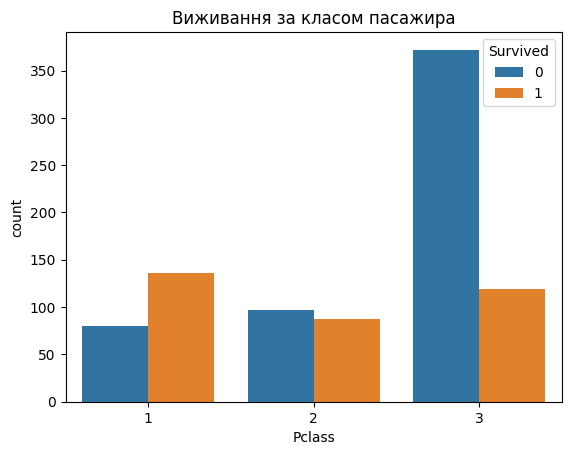

Висновки: Пасажири 1-го класу мали статистично значимо вищі шанси виживання (p < 0.05).


In [2]:
# Критерій: Хі-квадрат тест

contingency_table = pd.crosstab(df['Pclass'], df['Survived'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Гіпотеза 1: Виживання залежить від класу пасажира")
print(f"Хі-квадрат статистика: {chi2:.2f}, p-value: {p:.4f}, Ступені свободи: {dof}")

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Виживання за класом пасажира')
plt.show()

if p < 0.05:
    print("Висновки: Пасажири 1-го класу мали статистично значимо вищі шанси виживання (p < 0.05).")
else:
    print("Висновки: Немає статистично значимої залежності між класом і виживанням (p >= 0.05).")

Гіпотеза 2 — Жінки мали вищі шанси виживання

Гіпотеза 2: Жінки мали вищі шанси виживання
Хі-квадрат статистика: 260.72, p-value: 0.0000, Ступені свободи: 1


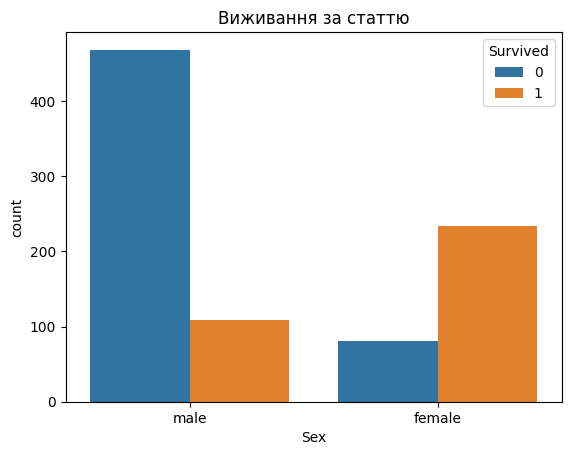

Висновки: Жінки мали статистично значимо вищі шанси виживання (p < 0.05).


In [4]:
# Критерій: Хі-квадрат тест

contingency_table = pd.crosstab(df['Sex'], df['Survived'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Гіпотеза 2: Жінки мали вищі шанси виживання")
print(f"Хі-квадрат статистика: {chi2:.2f}, p-value: {p:.4f}, Ступені свободи: {dof}")

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Виживання за статтю')
plt.show()
if p < 0.05:
    print("Висновки: Жінки мали статистично значимо вищі шанси виживання (p < 0.05).")
else:
    print("Висновки: Немає статистично значимої залежності між статтю і виживанням (p >= 0.05).")

Гіпотеза 3 — Середній вік виживших відрізняється

Гіпотеза 3: Вік виживших відрізняється
U-статистика: 57682.00, p-value: 0.1605


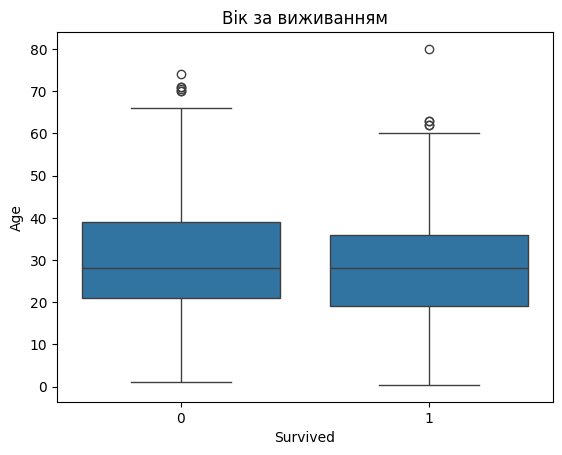

Висновки: Немає статистично значимої різниці у віці між вижившими і не вижившими (p >= 0.05).


In [5]:
# Критерій: Тест Манна-Уїтні

age_survived = df[df['Survived'] == 1]['Age'].dropna()
age_not_survived = df[df['Survived'] == 0]['Age'].dropna()

u_stat, p = stats.mannwhitneyu(age_survived, age_not_survived)

print("Гіпотеза 3: Вік виживших відрізняється")
print(f"U-статистика: {u_stat:.2f}, p-value: {p:.4f}")

sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Вік за виживанням')
plt.show()

if p < 0.05:
    print("Висновки: Розподіл віку виживших статистично значимо відрізняється від не виживших (p < 0.05).")
else:
    print("Висновки: Немає статистично значимої різниці у віці між вижившими і не вижившими (p >= 0.05).")

Гіпотеза 4 — Вища ціна квитка асоціюється з виживанням

Гіпотеза 4: Вища ціна квитка асоціюється з виживанням
Хі-квадрат статистика: 66.25, p-value: 0.0000, Ступені свободи: 1


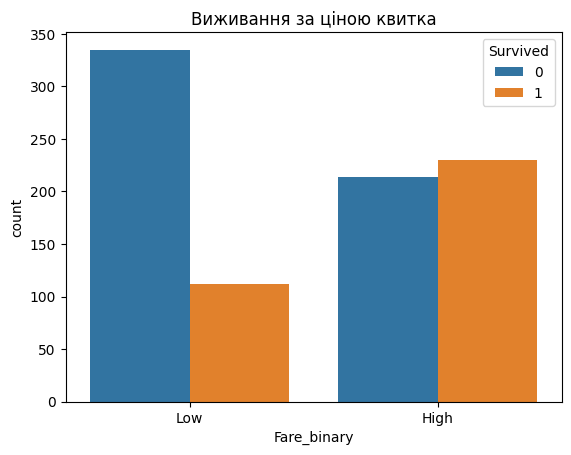

Висновки: Пасажири з вищою ціною квитка мали статистично значимо вищі шанси виживання (p < 0.05).


In [6]:
# Критерій: Хі-квадрат тест

median_fare = df['Fare'].median() #Поділ на групи за ціною квитка
df['Fare_binary'] = df['Fare'].apply(lambda x: 'High' if x > median_fare else 'Low')#Обчислюється медіана вартості квитка(2 стовпця)
contingency_table = pd.crosstab(df['Fare_binary'], df['Survived'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Гіпотеза 4: Вища ціна квитка асоціюється з виживанням")
print(f"Хі-квадрат статистика: {chi2:.2f}, p-value: {p:.4f}, Ступені свободи: {dof}")

sns.countplot(x='Fare_binary', hue='Survived', data=df)
plt.title('Виживання за ціною квитка')
plt.show()

if p < 0.05:
    print("Висновки: Пасажири з вищою ціною квитка мали статистично значимо вищі шанси виживання (p < 0.05).")
else:
    print("Висновки: Немає статистично значимої залежності між ціною квитка і виживанням (p >= 0.05).")

Гіпотеза 5 — Пасажири з Cherbourg мали вищі шанси виживання

Гіпотеза 5: Пасажири з Cherbourg мали вищі шанси виживання
Хі-квадрат статистика: 24.34, p-value: 0.0000, Ступені свободи: 1


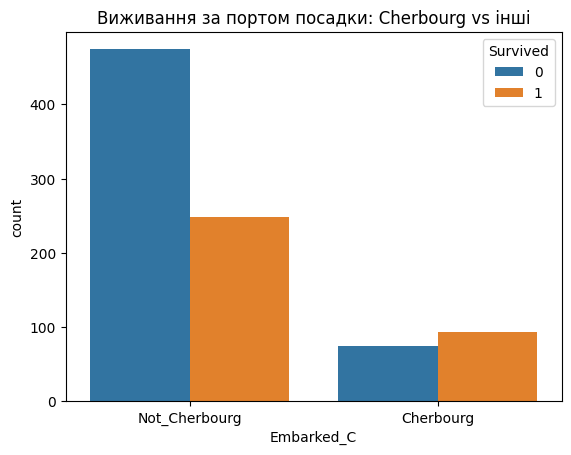

Висновки: Пасажири з Cherbourg мали статистично значимо вищі шанси виживання (p < 0.05).


In [7]:
# Критерій: Хі-квадрат тест

# Перетворюємо стовпець Embarked на дві категорії: Cherbourg та інші порти
df['Embarked_C'] = df['Embarked'].apply(lambda x: 'Cherbourg' if x == 'C' else 'Not_Cherbourg')
contingency_table = pd.crosstab(df['Embarked_C'], df['Survived'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Виводимо результати тесту
print("Гіпотеза 5: Пасажири з Cherbourg мали вищі шанси виживання")
print(f"Хі-квадрат статистика: {chi2:.2f}, p-value: {p:.4f}, Ступені свободи: {dof}")

# Візуалізація
sns.countplot(x='Embarked_C', hue='Survived', data=df)
plt.title('Виживання за портом посадки: Cherbourg vs інші')
plt.show()

# Висновки на основі p-value
if p < 0.05:
    print("Висновки: Пасажири з Cherbourg мали статистично значимо вищі шанси виживання (p < 0.05).")
else:
    print("Висновки: Немає статистично значимої залежності між портом посадки Cherbourg і виживанням (p >= 0.05).")


Гіпотеза 6 — Вік 1-го класу вищий, ніж 3-го

Гіпотеза 6: Вік 1-го класу вищий, ніж 3-го
U-статистика: 49572.00, p-value: 0.0000


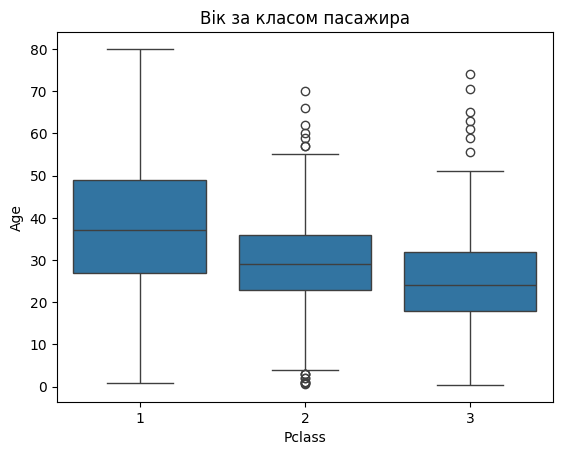

Висновки: Вік пасажирів 1-го класу статистично значимо вищий, ніж 3-го класу (p < 0.05).


In [8]:
# Критерій: Тест Манна-Уїтні

age_pclass1 = df[df['Pclass'] == 1]['Age'].dropna()
age_pclass3 = df[df['Pclass'] == 3]['Age'].dropna()

u_stat, p = stats.mannwhitneyu(age_pclass1, age_pclass3, alternative='greater')

print("Гіпотеза 6: Вік 1-го класу вищий, ніж 3-го")
print(f"U-статистика: {u_stat:.2f}, p-value: {p:.4f}")

sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Вік за класом пасажира')
plt.show()

if p < 0.05:
    print("Висновки: Вік пасажирів 1-го класу статистично значимо вищий, ніж 3-го класу (p < 0.05).")
else:
    print("Висновки: Немає статистично значимої різниці у віці між 1-м і 3-м класами (p >= 0.05).")

Гіпотеза 7 — Ціна квитка залежить від класу

Гіпотеза 7: Ціна квитка залежить від класу
H-статистика: 438.04, p-value: 0.0000


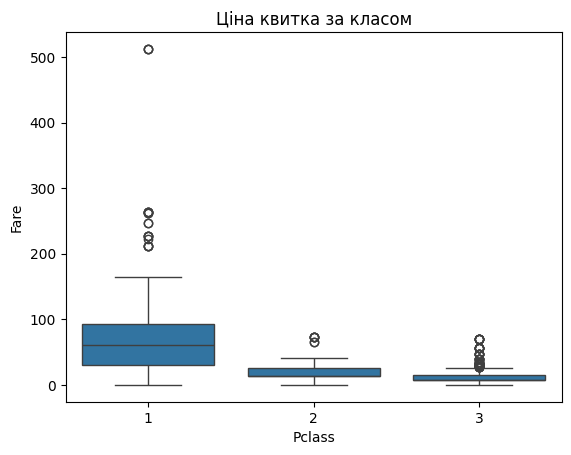

Висновки: Розподіл ціни квитка статистично значимо залежить від класу пасажира (p < 0.05).


In [9]:
# Критерій: Тест Крускала-Воліса

fare_pclass1 = df[df['Pclass'] == 1]['Fare'].dropna()
fare_pclass2 = df[df['Pclass'] == 2]['Fare'].dropna()
fare_pclass3 = df[df['Pclass'] == 3]['Fare'].dropna()

h_stat, p = stats.kruskal(fare_pclass1, fare_pclass2, fare_pclass3)

print("Гіпотеза 7: Ціна квитка залежить від класу")
print(f"H-статистика: {h_stat:.2f}, p-value: {p:.4f}")

sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Ціна квитка за класом')
plt.show()

if p < 0.05:
    print("Висновки: Розподіл ціни квитка статистично значимо залежить від класу пасажира (p < 0.05).")
else:
    print("Висновки: Немає статистично значимої різниці в ціні квитка між класами (p >= 0.05).")

Гіпотеза 8 — Кількість родичів (SibSp) впливає на виживання

Гіпотеза 8: Кількість родичів (SibSp) впливає на виживання
Хі-квадрат статистика: 37.27, p-value: 0.0000, Ступені свободи: 6


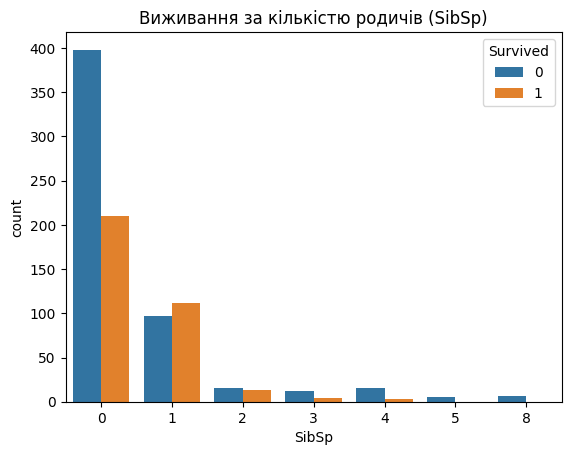

Висновки: Кількість родичів статистично значимо впливає на виживання (p < 0.05).


In [10]:
# Критерій: Хі-квадрат тест

contingency_table = pd.crosstab(df['SibSp'], df['Survived'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Гіпотеза 8: Кількість родичів (SibSp) впливає на виживання")
print(f"Хі-квадрат статистика: {chi2:.2f}, p-value: {p:.4f}, Ступені свободи: {dof}")

sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title('Виживання за кількістю родичів (SibSp)')
plt.show()

if p < 0.05:
    print("Висновки: Кількість родичів статистично значимо впливає на виживання (p < 0.05).")
else:
    print("Висновки: Немає статистично значимої залежності між кількістю родичів і виживанням (p >= 0.05).")

Гіпотеза 9 — Пасажири з дітьми мали різні шанси виживання

Гіпотеза 9: Пасажири з дітьми мали нижчі шанси виживання
Хі-квадрат статистика: 18.66, p-value: 0.0000, Ступені свободи: 1


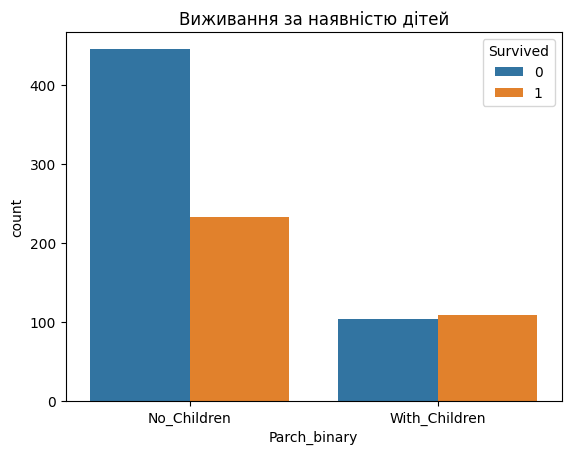

Висновки: Наявність дітей статистично значимо впливає на виживання (p < 0.05).


In [11]:
# Критерій: Хі-квадрат тест

df['Parch_binary'] = df['Parch'].apply(lambda x: 'With_Children' if x > 0 else 'No_Children')
contingency_table = pd.crosstab(df['Parch_binary'], df['Survived'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Гіпотеза 9: Пасажири з дітьми мали нижчі шанси виживання")
print(f"Хі-квадрат статистика: {chi2:.2f}, p-value: {p:.4f}, Ступені свободи: {dof}")

sns.countplot(x='Parch_binary', hue='Survived', data=df)
plt.title('Виживання за наявністю дітей')
plt.show()

if p < 0.05:
    print("Висновки: Наявність дітей статистично значимо впливає на виживання (p < 0.05).")
else:
    print("Висновки: Немає статистично значимої залежності між наявністю дітей і виживанням (p >= 0.05).")

Гіпотеза 10 — Кореляція між віком і ціною квитка

Гіпотеза: Ціна квитка відрізняється між віковими групами
H-статистика: 12.27, p-value: 0.0022
Висновки: Є статистично значимі відмінності між групами (p < 0.05).


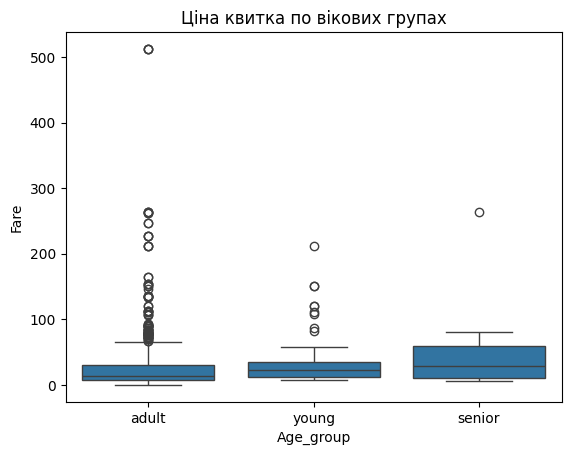

In [12]:
# Крускала-Волліса
# Вибираємо потрібні колонки і видаляємо пропущені значення
df_age_test = df[['Age', 'Fare']].dropna()

# Створюємо вікові групи
def age_group(age):
    if age < 18:
        return 'young'
    elif age < 60:
        return 'adult'
    else:
        return 'senior'

df_age_test['Age_group'] = df_age_test['Age'].apply(age_group)
fare_young = df_age_test[df_age_test['Age_group'] == 'young']['Fare']
fare_adult = df_age_test[df_age_test['Age_group'] == 'adult']['Fare']
fare_senior = df_age_test[df_age_test['Age_group'] == 'senior']['Fare']
h_stat, p_value = stats.kruskal(fare_young, fare_adult, fare_senior)
print("Гіпотеза: Ціна квитка відрізняється між віковими групами")
print(f"H-статистика: {h_stat:.2f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Висновки: Є статистично значимі відмінності між групами (p < 0.05).")
else:
    print("Висновки: Немає статистично значимих відмінностей між групами (p ≥ 0.05).")

sns.boxplot(x='Age_group', y='Fare', data=df_age_test)
plt.title("Ціна квитка по вікових групах")
plt.show()

Гіпотеза 11 — Жінки платили більше за квитки

Гіпотеза 11: Жінки платили більше за квитки
U-статистика: 119003.00, p-value: 0.0000


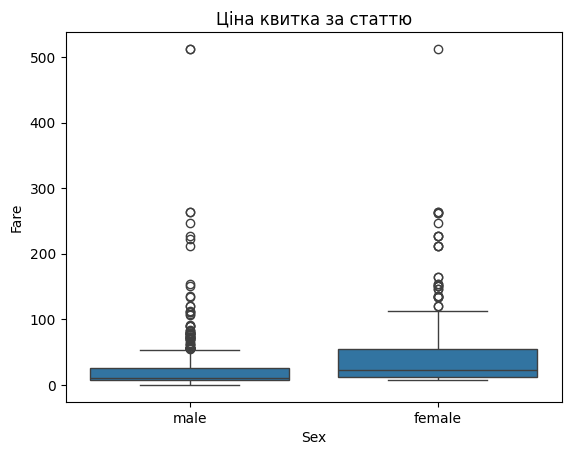

Висновки: Жінки платили статистично значимо більше за квитки, ніж чоловіки (p < 0.05).


In [13]:
# Критерій: Тест Манна-Уїтні

fare_female = df[df['Sex'] == 'female']['Fare'].dropna()
fare_male = df[df['Sex'] == 'male']['Fare'].dropna()

u_stat, p = stats.mannwhitneyu(fare_female, fare_male, alternative='greater')

print("Гіпотеза 11: Жінки платили більше за квитки")
print(f"U-статистика: {u_stat:.2f}, p-value: {p:.4f}")

sns.boxplot(x='Sex', y='Fare', data=df)
plt.title('Ціна квитка за статтю')
plt.show()

if p < 0.05:
    print("Висновки: Жінки платили статистично значимо більше за квитки, ніж чоловіки (p < 0.05).")
else:
    print("Висновки: Немає статистично значимої різниці в ціні квитка між статями (p >= 0.05).")

Гіпотеза 12 — Діти (<18) мали вищі шанси виживання

Гіпотеза 12: Діти (<18) мали вищі шанси виживання
Хі-квадрат статистика: 9.30, p-value: 0.0023, Ступені свободи: 1


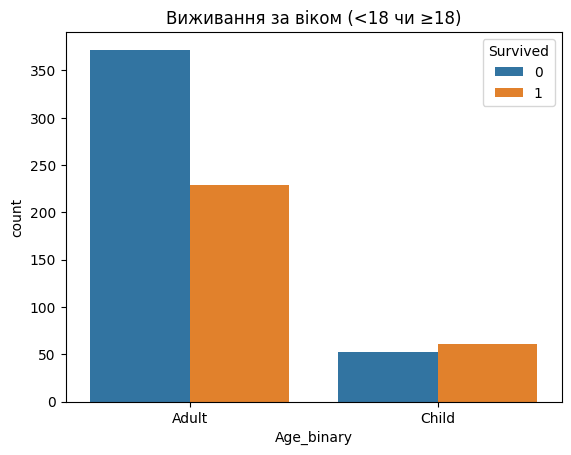

Висновки: Діти молодше 18 років мали статистично значимо вищі шанси виживання (p < 0.05).


In [14]:
# Критерій: Хі-квадрат тест

df['Age_binary'] = df['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult' if pd.notna(x) else np.nan)
contingency_table = pd.crosstab(df['Age_binary'], df['Survived'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Гіпотеза 12: Діти (<18) мали вищі шанси виживання")
print(f"Хі-квадрат статистика: {chi2:.2f}, p-value: {p:.4f}, Ступені свободи: {dof}")

sns.countplot(x='Age_binary', hue='Survived', data=df)
plt.title('Виживання за віком (<18 чи ≥18)')
plt.show()
if p < 0.05:
    print("Висновки: Діти молодше 18 років мали статистично значимо вищі шанси виживання (p < 0.05).")
else:
    print("Висновки: Немає статистично значимої залежності між віком (<18) і виживанням (p >= 0.05).")

Гіпотеза 13 — Вік залежав від порту посадки(3 штуки)

Гіпотеза 13: Вік залежить від порту посадки
H-статистика: 1.25, p-value: 0.5357


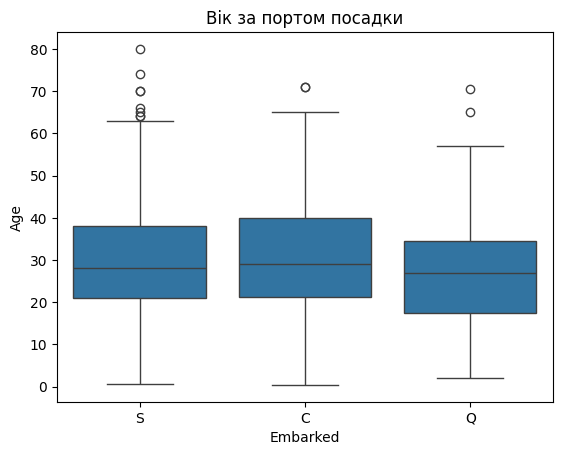

Висновки: Немає статистично значимої різниці у віці між портами посадки (p >= 0.05).


In [15]:
# Критерій: Тест Крускала-Воліса

age_c = df[df['Embarked'] == 'C']['Age'].dropna()
age_q = df[df['Embarked'] == 'Q']['Age'].dropna()
age_s = df[df['Embarked'] == 'S']['Age'].dropna()

h_stat, p = stats.kruskal(age_c, age_q, age_s)

print("Гіпотеза 13: Вік залежить від порту посадки")
print(f"H-статистика: {h_stat:.2f}, p-value: {p:.4f}")

sns.boxplot(x='Embarked', y='Age', data=df)
plt.title('Вік за портом посадки')
plt.show()

if p < 0.05:
    print("Висновки: Розподіл віку пасажирів статистично значимо залежить від порту посадки (p < 0.05).")
else:
    print("Висновки: Немає статистично значимої різниці у віці між портами посадки (p >= 0.05).")

Гіпотеза 14 — Пасажири 1-го класу частіше з родичами

Гіпотеза 14: Пасажири 1-го класу частіше з родичами
Хі-квадрат статистика: 5.47, p-value: 0.0648, Ступені свободи: 2


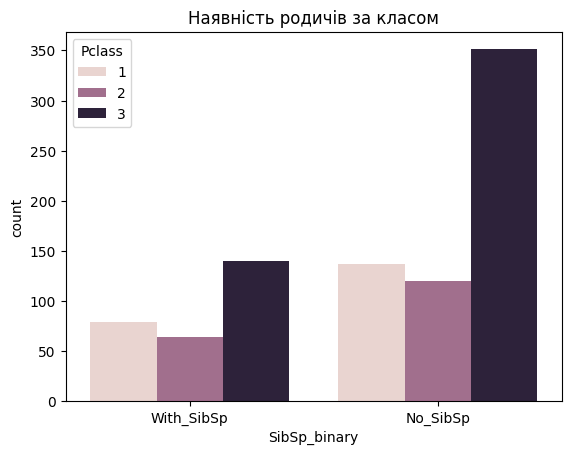

Висновки: Немає статистично значимої залежності між наявністю родичів і класом (p >= 0.05).


In [16]:
# Критерій: Хі-квадрат тест

df['SibSp_binary'] = df['SibSp'].apply(lambda x: 'With_SibSp' if x > 0 else 'No_SibSp')

contingency_table = pd.crosstab(df['SibSp_binary'], df['Pclass'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Гіпотеза 14: Пасажири 1-го класу частіше з родичами")
print(f"Хі-квадрат статистика: {chi2:.2f}, p-value: {p:.4f}, Ступені свободи: {dof}")

sns.countplot(x='SibSp_binary', hue='Pclass', data=df)
plt.title('Наявність родичів за класом')
plt.show()
if p < 0.05:
    print("Висновки: Пасажири 1-го класу статистично значимо частіше подорожували з родичами (p < 0.05).")
else:
    print("Висновки: Немає статистично значимої залежності між наявністю родичів і класом (p >= 0.05).")

Гіпотеза 15 — Вища ціна квитка пов’язана з 1-м класом

Гіпотеза 15: Вища ціна квитка пов’язана з 1-м класом
Хі-квадрат статистика: 279.93, p-value: 0.0000, Ступені свободи: 2


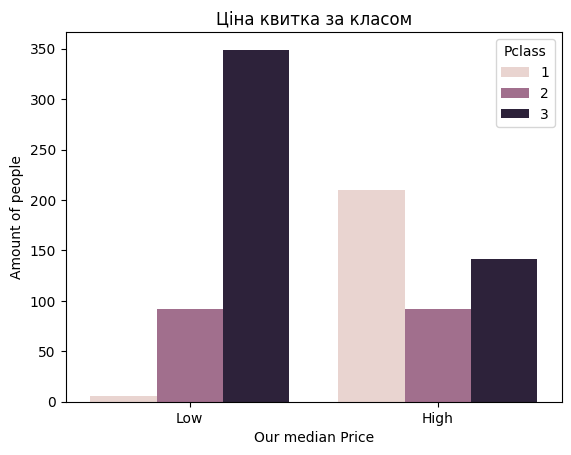

Висновки: Пасажири з вищою ціною квитка статистично значимо частіше були з 1-го класу (p < 0.05).


In [17]:
# Критерій: Хі-квадрат тест

contingency_table = pd.crosstab(df['Fare_binary'], df['Pclass'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Гіпотеза 15: Вища ціна квитка пов’язана з 1-м класом")
print(f"Хі-квадрат статистика: {chi2:.2f}, p-value: {p:.4f}, Ступені свободи: {dof}")

# Побудова графіка
sns.countplot(x='Fare_binary', hue='Pclass', data=df)
plt.title('Ціна квитка за класом')
plt.ylabel('Amount of people')  
plt.xlabel('Our median Price')  
plt.show()

# Висновки
if p < 0.05:
    print("Висновки: Пасажири з вищою ціною квитка статистично значимо частіше були з 1-го класу (p < 0.05).")
else:
    print("Висновки: Немає статистично значимої залежності між ціною квитка і класом (p >= 0.05).")


Гіпотеза 16 - Пасажири з більшим числом родичів платили вищу ціну

Гіпотеза 16: Пасажири з більшим числом родичів платили вищу ціну
U-статистика: 154636.50, p-value: 0.0000


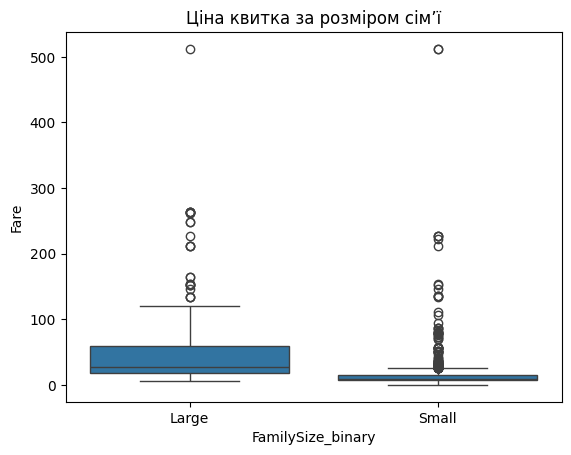

Висновки: Пасажири з більшим числом родичів платили статистично значимо вищу ціну за квиток (p < 0.05).


In [18]:
# Критерій: Тест Манна-Уїтні
#Створюємо змінну FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch']
#Ділимо за медіаною
median_family_size = df['FamilySize'].median()
fare_large_family = df[df['FamilySize'] > median_family_size]['Fare'].dropna()
fare_small_family = df[df['FamilySize'] <= median_family_size]['Fare'].dropna()
#Манна-Уїтні
u_stat, p = stats.mannwhitneyu(fare_large_family, fare_small_family, alternative='greater')

print("Гіпотеза 16: Пасажири з більшим числом родичів платили вищу ціну")
print(f"U-статистика: {u_stat:.2f}, p-value: {p:.4f}")
df['FamilySize_binary'] = df['FamilySize'].apply(lambda x: 'Large' if x > median_family_size else 'Small')
sns.boxplot(x='FamilySize_binary', y='Fare', data=df)
plt.title('Ціна квитка за розміром сім’ї')
plt.show()
if p < 0.05:
    print("Висновки: Пасажири з більшим числом родичів платили статистично значимо вищу ціну за квиток (p < 0.05).")
else:
    print("Висновки: Немає статистично значимої різниці в ціні квитка між пасажирами з різним числом родичів (p >= 0.05).")

Перевірка на нормальність

Тест Шапіро-Вілка для Age:
Статистика: 0.9815, p-value: 0.0000

Тест Шапіро-Вілка для Fare:
Статистика: 0.5219, p-value: 0.0000

Тест Шапіро-Вілка для Parch:
Статистика: 0.5328, p-value: 0.0000

Тест Шапіро-Вілка для SibSp:
Статистика: 0.5130, p-value: 0.0000


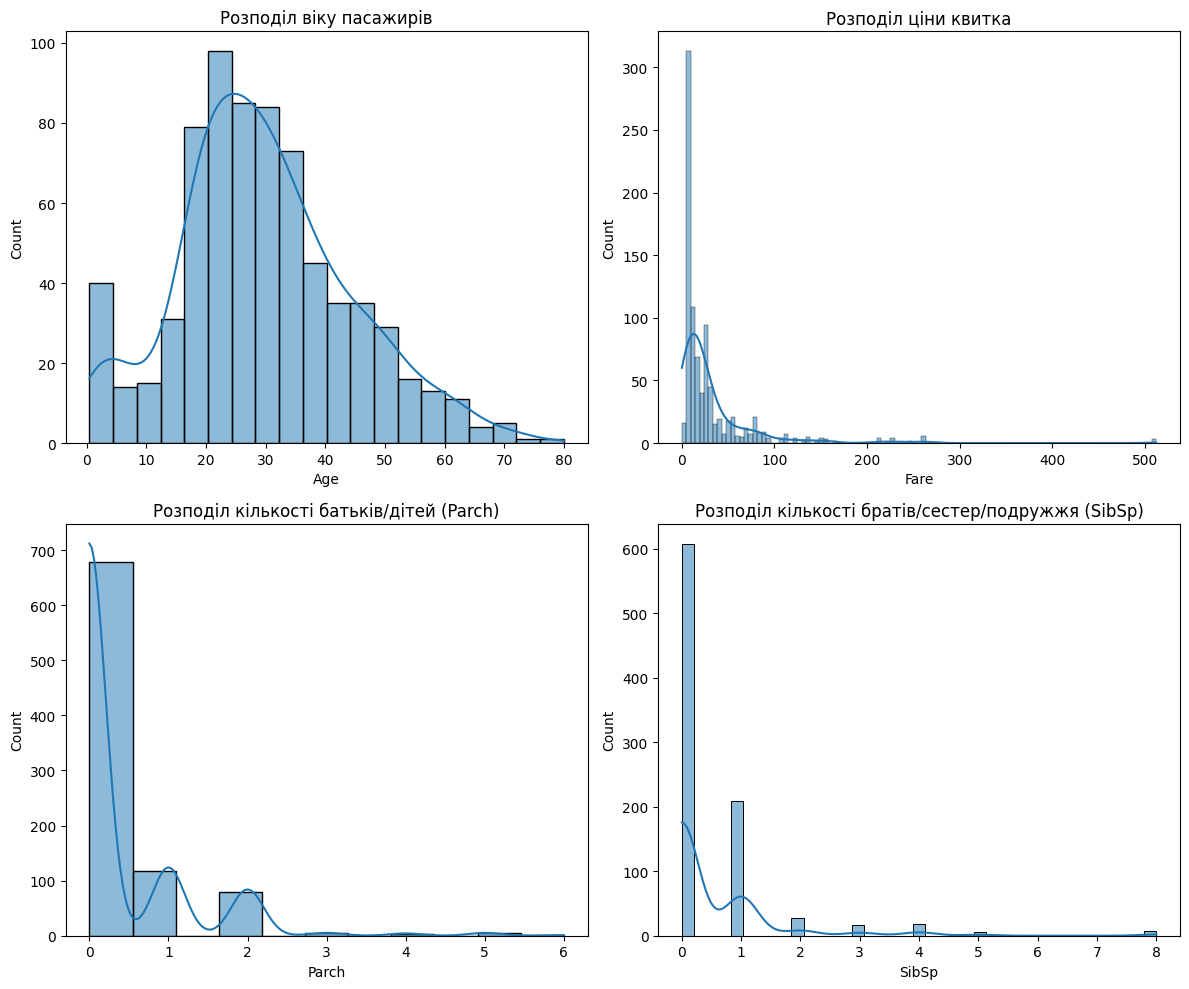

In [19]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження даних
path = "V:/seconnndddd/train.csv"
df = pd.read_csv(path)

# Видаляємо пропущені значення
age_data = df['Age'].dropna()
fare_data = df['Fare'].dropna()
parch_data = df['Parch'].dropna()
sibsp_data = df['SibSp'].dropna()

# Тест Шапіро-Вілка для Age
stat_age, p_age = stats.shapiro(age_data)
print("Тест Шапіро-Вілка для Age:")
print(f"Статистика: {stat_age:.4f}, p-value: {p_age:.4f}")

# Тест Шапіро-Вілка для Fare
stat_fare, p_fare = stats.shapiro(fare_data)
print("\nТест Шапіро-Вілка для Fare:")
print(f"Статистика: {stat_fare:.4f}, p-value: {p_fare:.4f}")

# Тест Шапіро-Вілка для Parch
stat_parch, p_parch = stats.shapiro(parch_data)
print("\nТест Шапіро-Вілка для Parch:")
print(f"Статистика: {stat_parch:.4f}, p-value: {p_parch:.4f}")

# Тест Шапіро-Вілка для SibSp
stat_sibsp, p_sibsp = stats.shapiro(sibsp_data)
print("\nТест Шапіро-Вілка для SibSp:")
print(f"Статистика: {stat_sibsp:.4f}, p-value: {p_sibsp:.4f}")

# Візуалізація
plt.figure(figsize=(12, 10))

# Гістограма для Age
plt.subplot(2, 2, 1)
sns.histplot(age_data, kde=True)
plt.title('Розподіл віку пасажирів')

# Гістограма для Fare
plt.subplot(2, 2, 2)
sns.histplot(fare_data, kde=True)
plt.title('Розподіл ціни квитка')

# Гістограма для Parch
plt.subplot(2, 2, 3)
sns.histplot(parch_data, kde=True)
plt.title('Розподіл кількості батьків/дітей (Parch)')

# Гістограма для SibSp
plt.subplot(2, 2, 4)
sns.histplot(sibsp_data, kde=True)
plt.title('Розподіл кількості братів/сестер/подружжя (SibSp)')

plt.tight_layout()
plt.show()

=== Описова статистика для всіх змінних ===

--- Змінна: Pclass ---
Описова статистика для Pclass:
count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
Медіана: 3.0


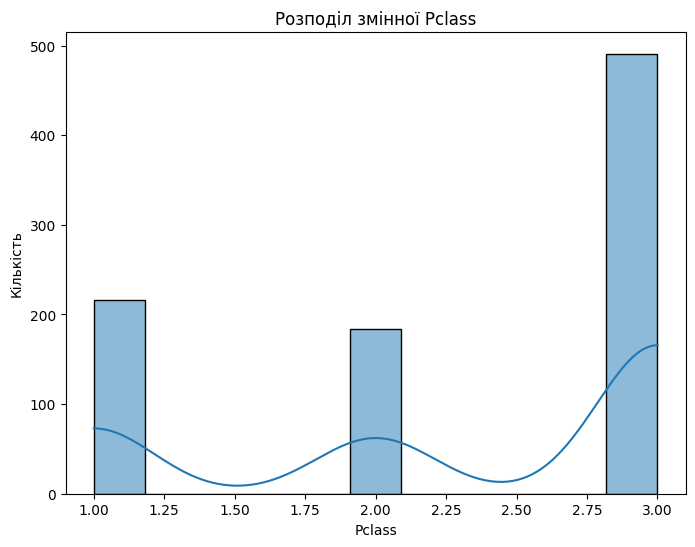


--- Змінна: Sex ---
Частоти для Sex:
Sex
male      577
female    314
Name: count, dtype: int64
Мода: male


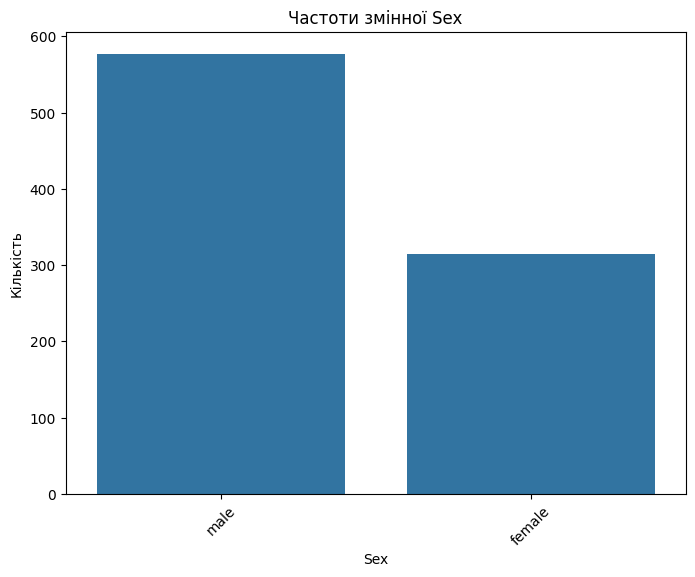


--- Змінна: Fare ---
Описова статистика для Fare:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
Медіана: 14.4542


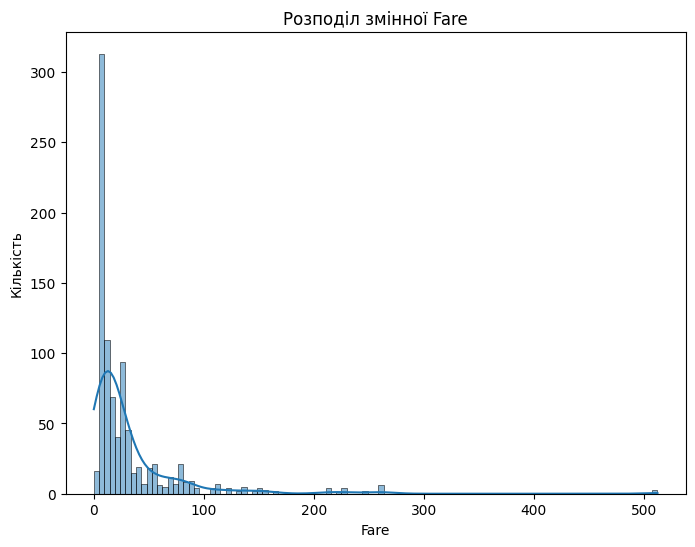


--- Змінна: Embarked ---
Частоти для Embarked:
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64
Мода: S


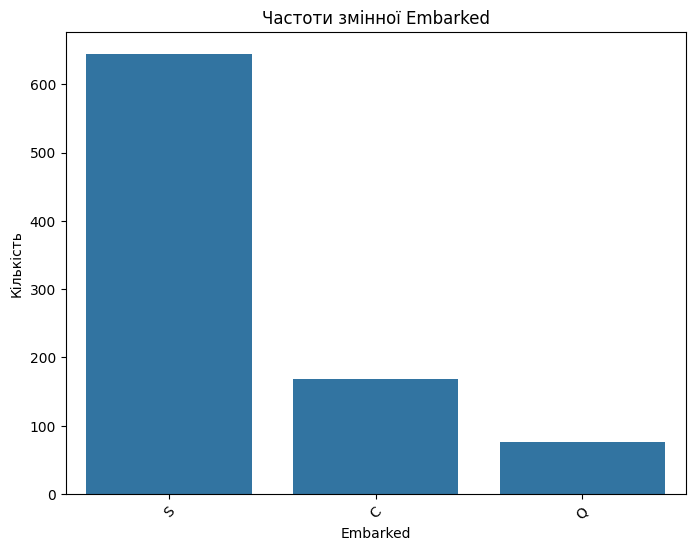


--- Змінна: SibSp ---
Описова статистика для SibSp:
count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64
Медіана: 0.0


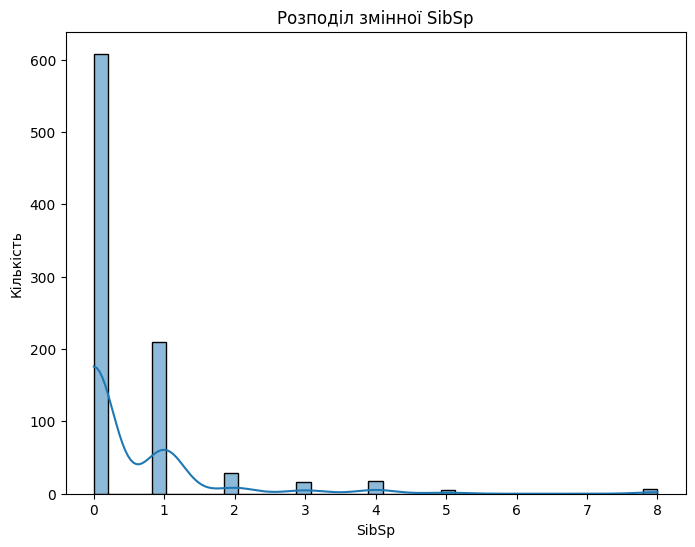


--- Змінна: Parch ---
Описова статистика для Parch:
count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64
Медіана: 0.0


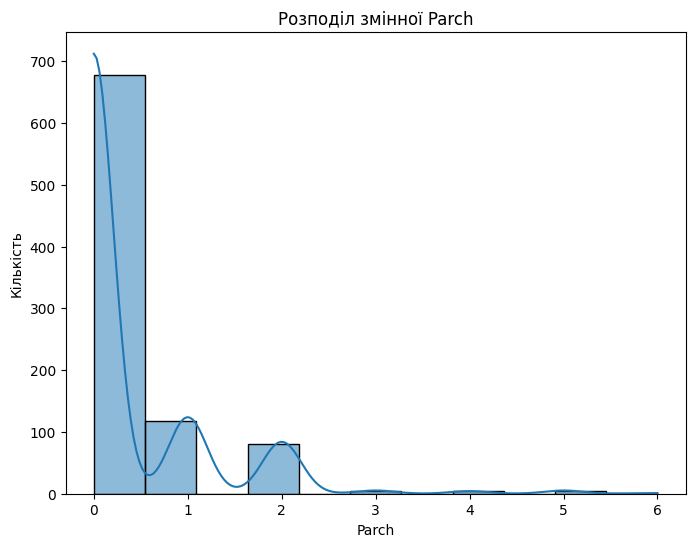


--- Змінна: Age ---
Описова статистика для Age:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
Медіана: 28.0


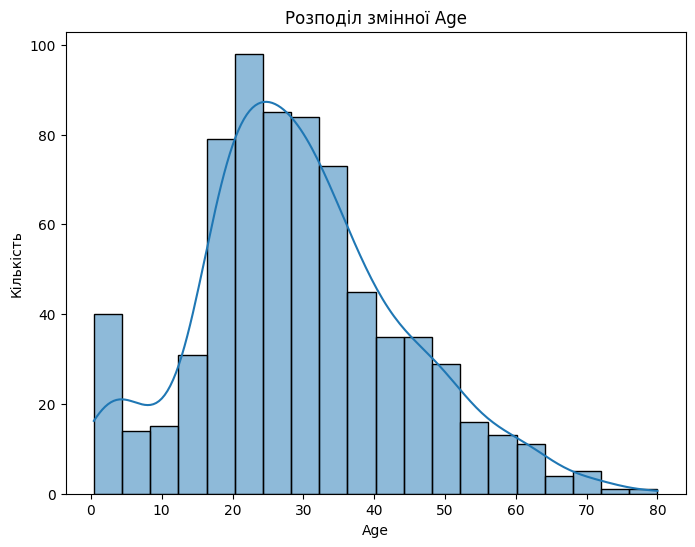

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Список змінних для аналізу 
variables = ['Pclass', 'Sex', 'Fare', 'Embarked', 'SibSp', 'Parch', 'Age']

def descriptive_statistics(df, variables):
    print("=== Описова статистика для всіх змінних ===")
    
    for var in variables:
        print(f"\n--- Змінна: {var} ---")
        
        # Перевірка, чи змінна існує 
        if var not in df.columns:
            print(f"Змінна {var} відсутня в DataFrame. Пропускаємо.")
            continue
        
        # Описова статистика для числових змінних
        if df[var].dtype in ['int64', 'float64']:
            print(f"Описова статистика для {var}:")
            print(df[var].describe())
            print(f"Медіана: {df[var].median()}")
            
            #(гістограма)
            plt.figure(figsize=(8, 6))
            sns.histplot(df[var].dropna(), kde=True)
            plt.title(f'Розподіл змінної {var}')
            plt.xlabel(var)
            plt.ylabel('Кількість')
            plt.show()
        
        # Частоти для категоріальних змінних
        else:
            print(f"Частоти для {var}:")
            print(df[var].value_counts(dropna=False))
            print(f"Мода: {df[var].mode()[0] if not df[var].mode().empty else 'Немає моди'}")
            
            # Візуалізація частот (countplot)
            plt.figure(figsize=(8, 6))
            sns.countplot(x=var, data=df)
            plt.title(f'Частоти змінної {var}')
            plt.xlabel(var)
            plt.ylabel('Кількість')
            plt.xticks(rotation=45)
            plt.show()

#Виклик 
descriptive_statistics(df, variables)